In [1]:
from sklearn.datasets import load_iris

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as mt

from sklearn.tree import export_graphviz
import graphviz

import seaborn as sns
import numpy as np
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# 결정 트리 모델의 시각화(Decision Tree Visualization)

In [2]:
# DecisionTree Classifier 생성
# random_state는 주고 싶은 만큼 주면 된다 
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf

DecisionTreeClassifier(random_state=156)

In [3]:
# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리
iris_data = load_iris()
iris_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
# 마찬가지로 random_state는 해도 되고 안해도 되지만 나중에 똑같이 랜덤을 위한 
X_train , X_test , y_train , y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2,  random_state=11)

In [5]:
# DecisionTreeClassifer 학습.
dt_clf.fit(X_train , y_train)

DecisionTreeClassifier(random_state=156)

In [6]:
y_pred = dt_clf.predict(X_test) # 예측값 
accuracy = mt.accuracy_score(y_test, y_pred) # 정확도
matrix = mt.confusion_matrix(y_test, y_pred) # 오차행렬 출력 

In [7]:
# 예측값
y_pred

array([2, 2, 1, 1, 2, 0, 1, 0, 0, 1, 1, 1, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0,
       0, 1, 0, 0, 2, 1, 0, 1])

In [8]:
# 실제값 
y_test

array([2, 2, 2, 1, 2, 0, 1, 0, 0, 1, 2, 1, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0,
       0, 1, 0, 0, 2, 1, 0, 1])

In [9]:
print("Decision Tree 정확도: {:.4f}".format(accuracy))
print('Decision Tree Confusion Matrix:','\n', matrix)

# 2개가 예측이 틀렸다 

Decision Tree 정확도: 0.9333
Decision Tree Confusion Matrix: 
 [[ 9  0  0]
 [ 0 10  0]
 [ 0  2  9]]


In [18]:
# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함.
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names, feature_names = iris_data.feature_names, impurity=True, filled=True)

In [19]:
# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [12]:
# feature importance 추출
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

Feature importances:
[0.025 0.    0.555 0.42 ]


In [13]:
# feature별 importance 매핑
for name, value in zip(iris_data.feature_names , dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<Axes: >

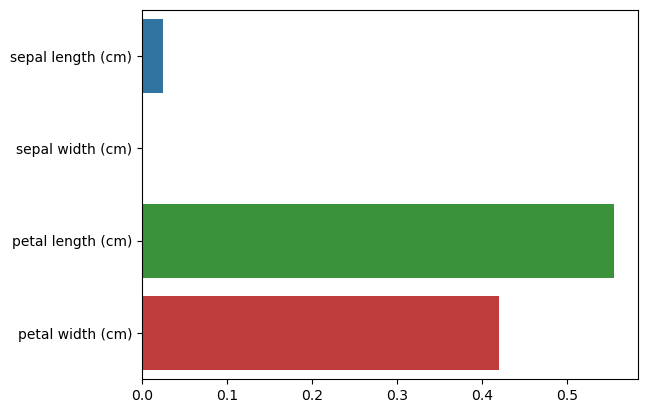

In [14]:
# feature importance를 column 별로 시각화 하기
sns.barplot(x=dt_clf.feature_importances_ , y=iris_data.feature_names)

* petal length가 가장 피쳐중요도가 높다. (그룹을 분리하는데 큰 역할을 했다)

# KNN

In [15]:
# n_neighbors = k의 개수 = 본인 마음 
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [16]:
# 새로운 데이터에 대한 분류
# 하나씩 예측
# 아래의 데이터는 0 클래스로 예측되었다는 뜻 

X_new = np.array([[5, 2.9 ,1 ,0.2]])

prediction = knn.predict(X_new)
print("예측 : {}".format(prediction))

예측 : [0]


In [17]:
# 하나씩이 아닌 전체 데이터 넣어 예측

# 테스트 데이터에 대한 정확도
y_pred = knn.predict(X_test)

print("테스트 데이터 예측값  \n {}".format(y_pred))
print("KNN 정확도 : {:.4f}".format(knn.score(X_test, y_test)))

테스트 데이터 예측값  
 [2 2 1 1 2 0 1 0 0 1 1 1 1 2 2 0 2 1 2 2 1 0 0 1 0 0 2 1 0 1]
KNN 정확도 : 0.9333
